In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from typing import Union

# Regression

---

We assume that there is a response value $y \in \mathbb{R}$ which comes from a noisy function with the observation $\mathbf{x} \in \mathbb{R}^n$:

$$
y = f(\mathbf{x}) + \eta
$$

Wo often use that f is a linear function, $f(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$ and $\eta$ is a zero mean gaussian distribution with variance $\sigma^2$. With these assumptions we can write:

$$
p(y|\mathbf{x}) = \mathcal{N}(y|\mathbf{w}^T \mathbf{x}, \sigma^2)
$$

The model predicts a linear relationship between conditional expectation of observations $y_i$ and inputs $\mathbf{x}_i$:

$$
\mathbb{E} [ y_i | \mathbf{x}_i ] = \mathbf{w}^T \mathbf{x}_i = f(\mathbf{x}_i ; \mathbf{w})
$$

With this we can define the likelihood function, which is given by:

$$
L(\mathbf{w}) \propto \prod_i \exp \left[ - \frac{1}{2 \sigma^2} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right]
$$

The likelihood can be seen as the probability of observing our data given our model $\mathbf{w}$. Logically, if we want the model which most accurately describes our data, we want to find $\mathbf{w}$ for which the Likelihood is maximised because:

$$
(y_i - \mathbf{w}^T \mathbf{x}_i)^2 > 0 \Rightarrow \exp \left[ - \frac{1}{2 \sigma^2} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right] < 1 = \exp(0) \Leftarrow (y_i - \mathbf{w}^T \mathbf{x}_i)^2 = 0
$$

This we get:

$$
\hat{\mathbf{w}} = \arg \max_{\mathbf{w}} L(\mathbf{w}) = \arg \min_{\mathbf{w}} \left[ - L({\mathbf{w}}) \right] = \arg \min_{\mathbf{w}} \left[ - log(L({\mathbf{w}}) \right]
$$

Note: Because the logarithim is a monoton increasing function: $\arg \max f(x) = \arg \max \log(f(x))$

$$
\begin{align*}
\hat{\mathbf{w}} 
&= \arg \min_\mathbf{w} \sum_i (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \\
&= \arg \min ||\mathbf{y} - X \mathbf{w} ||^2 \\
&= RSS(\mathbf{w})
\end{align}
$$

To find this minima, we note that $f(x) = x^2$ is a convex function and we know $||v|| \geq 0 \forall \ v \ \in \mathbb{R}^d$. Thus we know there exist a definite and single minima to this function. To find this minima we take the derivative of the residual sum of squares, or RSS, in respect to $\mathbf{w}$

$$
\begin{align*}
\frac{\partial RSS(\mathbf{w})}{\partial \mathbf{w}}

= \frac{\partial}{\partial \mathbf{w}} ||\mathbf{y} - X \mathbf{w}||^2 = \frac{\partial}{\partial \mathbf{w}} (\mathbf{y} - X \mathbf{w})^T (\mathbf{y} - X \mathbf{w}) &= \frac{\partial}{\partial \mathbf{w}} \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T X \mathbf{w} + \mathbf{w}^T X^T X \mathbf{w} \\
&= -2 X^T \mathbf{y} + 2 X^T X \mathbf{w}
\end{align*}
$$

$$
\Rightarrow -2 X^T \mathbf{y} + 2 X^T X \mathbf{w} = 0 \Leftrightarrow \hat{\mathbf{w}} = (X^T X)^{-1} X^T \mathbf{y}
$$

# Implementation:

---

### Data generator:

In [2]:
def data_generator(f, x: list, y: list) -> None:
  xi = 4 * (np.random.random() - 0.5)
  yi = np.random.normal(loc=f(xi), scale=0.5)
  x.append(xi)
  y.append(yi)

### Basis Expansion

In [3]:
def basis_expansion(x: Union[list, np.array], degree: int) -> np.array:
  basis = [[xi**k for k in range(degree + 1)] for xi in x]
  return np.array(basis)

### Optimal w

In [4]:
def RSS(X: np.array, y: np.array) -> np.array:
  w_opt = np.linalg.inv((X.T @ X)) @ X.T @ y
  return w_opt

### Visualization

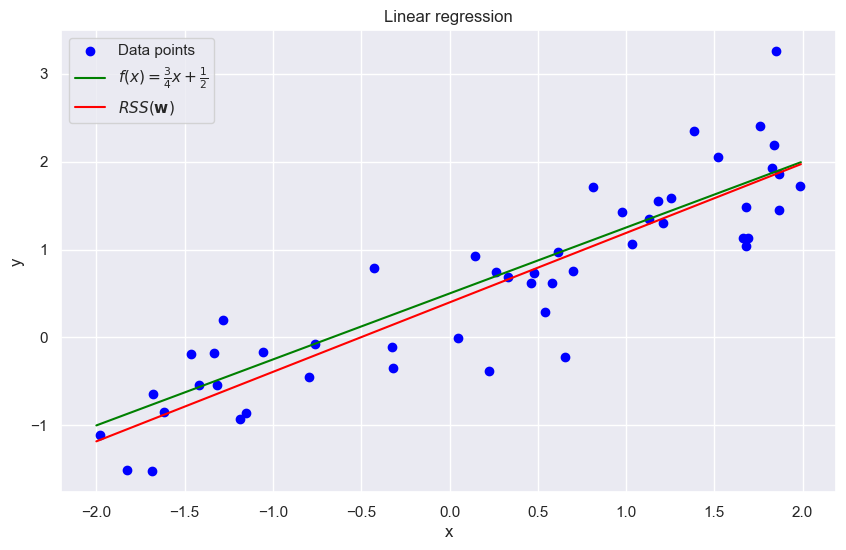

In [5]:
n = 50
x = []
y = []

x_range = np.arange(-2, 2, 0.01)
  
f = lambda x : 0.75 * x + 0.5

for i in range(n):
  data_generator(f, x, y)

x = basis_expansion(x, 1)
y = np.array(y)

w = RSS(x, y)
  
plt.figure(figsize=(10, 6))
plt.title('Linear regression')
plt.scatter(x[:, 1], y[:], label='Data points', color='blue')
plt.plot(x_range, f(x_range), label=r'$f(x) = \frac{3}{4}x + \frac{1}{2}$', color='green')
plt.plot(x_range, (w @ basis_expansion(x_range, 1).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

 We can also use regression on non-linear functions like polynomes using a basis expansion

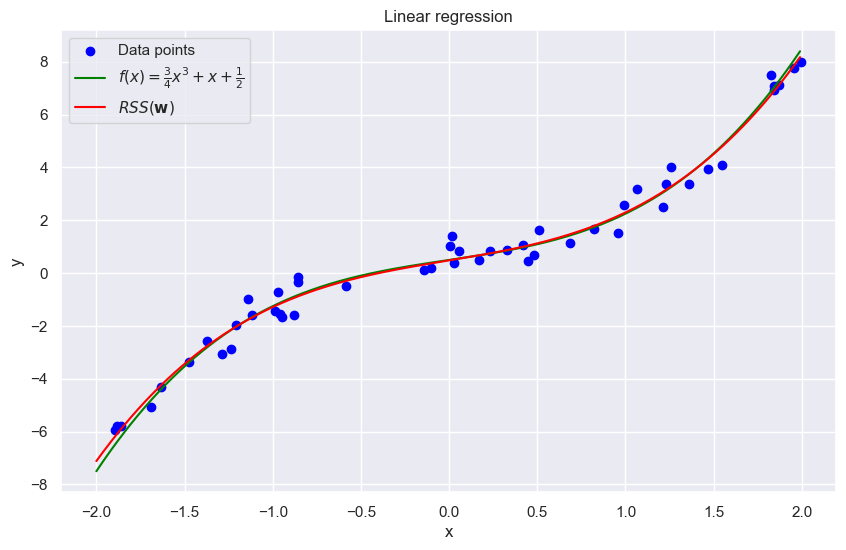

In [6]:
n = 50
x = []
y = []

x_range = np.arange(-2, 2, 0.01)
  
f = lambda x : 0.75 * x**3 + x + 0.5

for i in range(n):
  data_generator(f, x, y)
  
x = basis_expansion(x, 3)
y = np.array(y)

w = RSS(x, y)
  
plt.figure(figsize=(10, 6))
plt.title('Linear regression')
plt.scatter(x[:, 1], y[:], label='Data points', color='blue')
plt.plot(x_range, f(x_range), label=r'$f(x) = \frac{3}{4}x^3 + x + \frac{1}{2}$', color='green')
plt.plot(x_range, (w @ basis_expansion(x_range, 3).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

We can also approximate more complex functions with polynomes

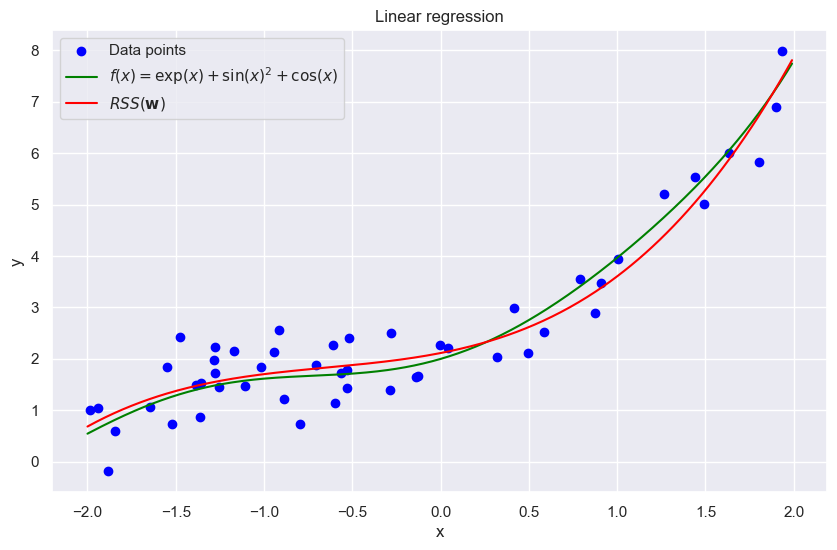

In [14]:
n = 50
x = []
y = []

x_range = np.arange(-2, 2, 0.01)

f = lambda x : np.exp(x) + np.sin(x)**2 + np.cos(x)

for i in range(n):
  data_generator(f, x, y)
  
xb = basis_expansion(x, 3)
yb = np.array(y)

w = RSS(xb, yb)
  
plt.figure(figsize=(10, 6))
plt.title('Linear regression')
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x_range, f(x_range), label=r'$f(x) = \exp(x) + \sin(x)^2 + \cos(x)$', color='green')
plt.plot(x_range, (w @ basis_expansion(x_range, 3).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

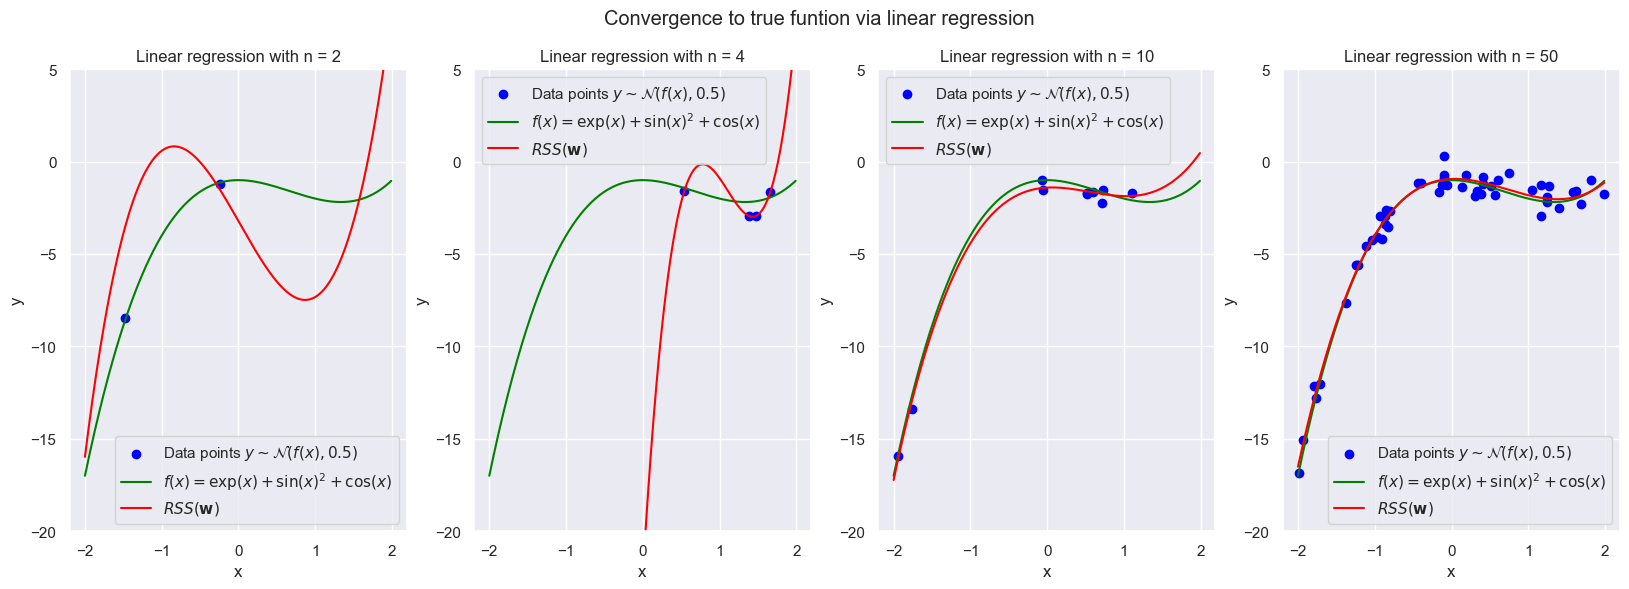

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
fig.figsize=(10, 6)
fig.suptitle('Convergence to true funtion via linear regression')
f = lambda x: x**3 - 2*x**2 - 1

amount_data_points = [2, 4, 10, 50]
for ax, data_points in zip(axs, amount_data_points):
  x = []
  y = []
  x_range = np.arange(-2, 2, 0.01)
  
  for i in range(data_points):
    data_generator(f, x, y)
    
  xb = basis_expansion(x, 3)
  yb = np.array(y)
  
  w = RSS(xb, yb)
  ax.set_title(f'Linear regression with n = {data_points}')
  ax.scatter(x, y, label=r'Data points $y \sim \mathcal{N}(f(x), 0.5)$', color='blue')
  ax.plot(x_range, f(x_range), label=r'$f(x) = \exp(x) + \sin(x)^2 + \cos(x)$', color='green')
  ax.plot(x_range, (w @ basis_expansion(x_range, 3).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_ylim([-20, 5])
  ax.legend()

## Frequentist confidence limits

With our optimal solution we can derive a confidence limit of our function ($\mathbf{\eta} \sim \mathcal{N}(0, \sigma^2 I_n)$):

$$
\begin{align*}
\hat{\mathbf{w}} 
&= (X^T X)^{-1} X^T \mathbf{y}  \\
&= (X^T X)^{-1} X^T (X \mathbf{w} + \mathbf{\eta}) \\
&= (X^T X)^{-1} X^T X \mathbf{w} + (X^T X)^{-1} X^T \mathbf{\eta} \\
&= \mathbf{w} + (X^T X)^{-1} X^T \mathbf{\eta} \\
\Rightarrow \hat{\mathbf{w}} - \mathbf{w} &= (X^T X)^{-1} X^T \mathbf{\eta} \\
\Rightarrow \hat{\mathbf{w}} - \mathbf{w} | X, \sigma^2 &\sim \mathcal{N}(0, \sigma^2 (X^T X)^{-1})
\end{align*}
$$

So basically, the error of our estimation of the true $\mathbf{w}$ is gaussian distributed with mean 0 and variance $\sigma^2 (X^T X)^{-1}$ with this we can then derive our condfidence intervalls. For the k-th component of $\mathbf{w}$ with $S = (X^T X)^{-1}$ we get:

$$
\hat{w_k} - w_k \sim \mathcal{N}(0, \sigma^2 S^{kk}) \Leftrightarrow \frac{w - w_k}{\sqrt{\sigma^2 S^{kk}}} = z_k \sim \mathcal{N}(0, 1) 
$$

$$
\mathbb{P}(z_k < k_c) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{k_c} e^{\frac{t^2}{2}} dt = \Phi(k_c) = 1 - c
$$